In [17]:
import sys 
sys.path.append('/host/d/Github')
import os
import torch
import numpy as np 
import nibabel as nb
import Diffusion_denoising_thin_slice.functions_collection as ff
import Diffusion_denoising_thin_slice.Build_lists.Build_list as Build_list

In [23]:
build_sheet =  Build_list.Build(os.path.join('/host/d/Data/NYU_MR/Patient_lists/NYU_MR_simulation.xlsx'))

# define train patient list
_, patient_list_train, _, noise_file_all_list_train, noise_file_odd_list_train, noise_file_even_list_train, gt_file_list_train, slice_num_list_train = build_sheet.__build__(batch_list = ['train','test']) 

In [24]:
all_data = []
for i in range(0, len(gt_file_list_train)):
    print('patient id is: ', patient_list_train[i])
    gt_nii = nb.load(gt_file_list_train[i])
    gt_data = gt_nii.get_fdata()
    # I want to see the pixel value distribution of the whole 3D volume, and plot histogram
    gt_data_flat = gt_data.flatten()
    all_data.append(gt_data_flat)
   

patient id is:  file1000015
patient id is:  file1000057
patient id is:  file1000059
patient id is:  file1000060
patient id is:  file1000094
patient id is:  file1000097
patient id is:  file1000109
patient id is:  file1000117
patient id is:  file1000154
patient id is:  file1000176
patient id is:  file1000181
patient id is:  file1000204
patient id is:  file1000210
patient id is:  file1000233
patient id is:  file1000250
patient id is:  file1000275
patient id is:  file1000300
patient id is:  file1000311
patient id is:  file1000340
patient id is:  file1000351
patient id is:  file1000363
patient id is:  file1000378
patient id is:  file1000382
patient id is:  file1000401
patient id is:  file1000408
patient id is:  file1000416
patient id is:  file1000448
patient id is:  file1000449
patient id is:  file1000452
patient id is:  file1000467
patient id is:  file1000475
patient id is:  file1000486
patient id is:  file1000493
patient id is:  file1000495
patient id is:  file1000501
patient id is:  file

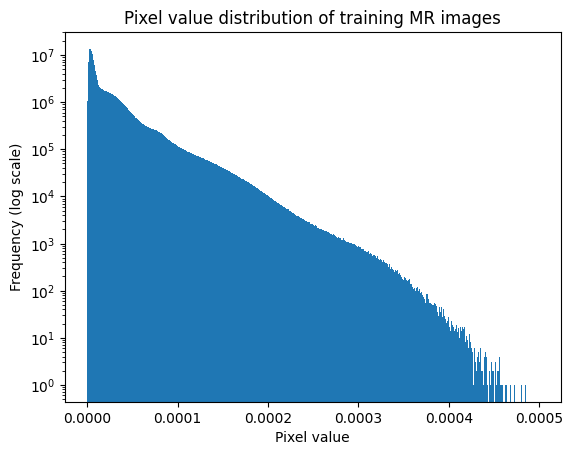

In [25]:
# make all data a big array and plot histogram
all_data_array = np.concatenate(all_data, axis=0)
import matplotlib.pyplot as plt
plt.hist(all_data_array, bins=1000)
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Frequency (log scale)')
plt.title('Pixel value distribution of training MR images')
plt.show()

In [27]:
# now find out the percentiles
p1 = np.percentile(all_data_array, 1)
p10 = np.percentile(all_data_array, 10)
p90 = np.percentile(all_data_array, 90)
p99 = np.percentile(all_data_array, 99)
print('1st percentile: ', p1)
print('10th percentile: ', p10)
print('90th percentile: ', p90)
print('99th percentile: ', p99)

1st percentile:  8.475447979152832e-07
10th percentile:  2.4099069875440247e-06
90th percentile:  5.49229503088036e-05
99th percentile:  0.00014750010824759137
